In [6]:
#this is to learn and simulate 
import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd


torch.manual_seed(42)
p = torch.tensor([10,8,6,4,2],dtype=torch.float)
p1=torch.diag(p)
n=5
tao=100
dt = 1e-3
T=int(10/dt)
B=10
w=torch.randn(n,n, device='cpu', requires_grad=True,dtype=torch.float)
lr = 1e-1
n_epochs = 1000

optimizer = optim.Adam([w], lr=lr)
V=torch.zeros(T,n)
ep=np.arange(n_epochs)
Loss=torch.zeros(n_epochs,)
Wmean=torch.zeros(n_epochs,)


for epoch in range(n_epochs):
    #generate 
    ze = pd.DataFrame({'Value': torch.from_numpy(np.absolute(np.array(np.random.normal(0, 1, n)))),
                    'Type': 'E',
                    'sign': np.array([1] * n, dtype='int32')})    
    zi = pd.DataFrame({'Value': torch.from_numpy(-np.absolute(np.array(np.random.normal(0, 1, n)))),
                    'Type': 'I',
                    'sign': np.array([-1] * n, dtype='int32')})    
    zf = pd.concat([ze, zi])
    zd = zf.sample(frac=1).reset_index(drop=True)
    z=torch.zeros(1,n)
    for a in range(n):
        z[:,a]=(zd.loc[a,'Value'])
        
    wi=torch.randn(n,n)
    for i in range(n):
        for j in range(n):
            #print (z.loc[j,'sign'])
            #print (w[i,j])
            wi[i,j]=(zd.loc[j,'sign'])*w[i,j]
            #print (w[i,j])
 
    w1=torch.diag(wi)
    w_rec=torch.diag(w1)
    w1_rec = wi-w_rec
   
    loss=0
    for t in range(T):
        N=torch.randn(1,n)
        z_dot=(-z+(z@w1_rec)/math.sqrt(n))
        z = z + z_dot*dt+N*math.sqrt(dt)
        loss = loss + ((z@p1)**2).mean()
    
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    Loss[epoch]=loss
    w_dia=torch.diag(w)
    w_mean=torch.mean(w_dia)
    Wmean[epoch]=w_mean
 













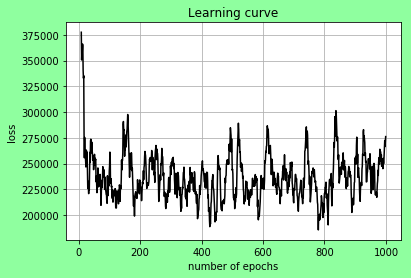

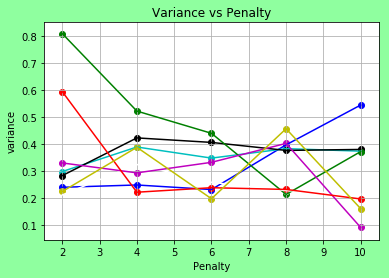

In [11]:

#this is to plot the graph 
fig = plt.figure()
fig.patch.set_facecolor('xkcd:mint green')
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.title('Learning curve')
df=pd.DataFrame(Loss.detach().numpy())
rolling_mean = df.rolling(window=10).mean()
plt.plot(ep, rolling_mean, label='Learning Curve', color='k')
plt.grid(True)
plt.show()



fig = plt.figure()
fig.patch.set_facecolor('xkcd:mint green')
plt.ylabel('variance')
plt.xlabel('Penalty')
plt.title('Variance vs Penalty')
plt.grid(True)
color=['b','c','k','g','w','m','r','y']
for a in range(8):
    ze = pd.DataFrame({'Value': torch.from_numpy(np.absolute(np.array(np.random.normal(0, 1, n)))),
                    'Type': 'E',
                    'sign': np.array([1] * n, dtype='int32')})    
    zi = pd.DataFrame({'Value': torch.from_numpy(-np.absolute(np.array(np.random.normal(0, 1, n)))),
                    'Type': 'I',
                    'sign': np.array([-1] * n, dtype='int32')})    
    zf = pd.concat([ze, zi])
    zd = zf.sample(frac=1).reset_index(drop=True)
    z=torch.zeros(1,n)
    for m in range(n):
        z[:,m]=(zd.loc[m,'Value'])
        

    Z=torch.zeros(T,n)
   
    
    for t in range(T):
        N=torch.randn(1,n)
        z_dot=(-z+(z@w1_rec)/math.sqrt(n))
        z = z + z_dot*dt+N*math.sqrt(dt)
        Z[t] = z
        Z_split = torch.split(Z,int(T/2),dim=0)[1]
        
    V=torch.zeros(n,1)

    for i in range(n):
        V[i]=torch.var(Z_split[:,i])  
        
    plt.scatter(p,V.detach().numpy(),color=color[a])   
    plt.plot(p.detach().numpy(),V.detach().numpy(),color=color[a]) 
    
plt.show() 



